In [1]:
import numpy as np

# Get the interactive Tools for Matplotlib
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

import gensim.downloader as api
from gensim.models import KeyedVectors

In [2]:
model = api.load("glove-wiki-gigaword-100")
print(type(model))

<class 'gensim.models.keyedvectors.KeyedVectors'>


In [3]:
model['bread']

array([-0.66146  ,  0.94335  , -0.72214  ,  0.17403  , -0.42524  ,
        0.36303  ,  1.0135   , -0.14802  ,  0.25817  , -0.20326  ,
       -0.64338  ,  0.16632  ,  0.61518  ,  1.397    , -0.094506 ,
        0.0041843, -0.18976  , -0.55421  , -0.39371  , -0.22501  ,
       -0.34643  ,  0.32076  ,  0.34395  , -0.7034   ,  0.23932  ,
        0.69951  , -0.16461  , -0.31819  , -0.34034  , -0.44906  ,
       -0.069667 ,  0.35348  ,  0.17498  , -0.95057  , -0.2209   ,
        1.0647   ,  0.23231  ,  0.32569  ,  0.47662  , -1.1206   ,
        0.28168  , -0.75172  , -0.54654  , -0.66337  ,  0.34804  ,
       -0.69058  , -0.77092  , -0.40167  , -0.069351 , -0.049238 ,
       -0.39351  ,  0.16735  , -0.14512  ,  1.0083   , -1.0608   ,
       -0.87314  , -0.29339  ,  0.68278  ,  0.61634  , -0.088844 ,
        0.88094  ,  0.099809 , -0.27161  , -0.58026  ,  0.50364  ,
       -0.93814  ,  0.67576  , -0.43124  , -0.10517  , -1.2404   ,
       -0.74353  ,  0.28637  ,  0.29012  ,  0.89377  ,  0.6740

In [4]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [5]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [6]:
analogy('australia', 'beer', 'france')

'champagne'

In [7]:
analogy('pencil', 'sketching', 'camera')

'photographing'

In [8]:
analogy('tall', 'tallest', 'long')

'longest'

In [9]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


In [10]:
def display_tsne_scatterplot(model, words=None, sample=0, perplexity=30, n_iter=1000):
    from sklearn.manifold import TSNE
    import numpy as np
    import matplotlib.pyplot as plt
    
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.index_to_key), sample)
        else:
            words = list(model.index_to_key)
        
    word_vectors = np.array([model[w] for w in words])

    tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity, n_iter=n_iter)
    twodim = tsne.fit_transform(word_vectors)
    
    plt.figure(figsize=(10,10))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.annotate(word, (x, y), xytext=(x+0.05, y+0.05))
    plt.title(f"Word vectors visualization using t-SNE")

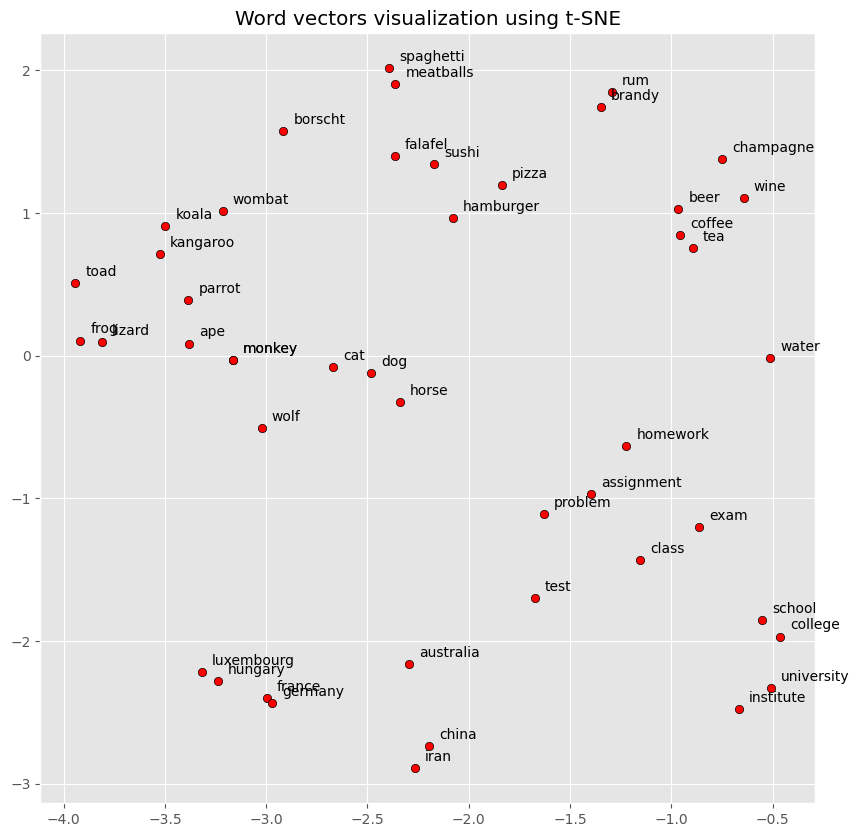

In [11]:
display_tsne_scatterplot(model, 
    ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
        'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
        'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
        'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
        'france', 'germany', 'hungary', 'luxembourg', 'australia', 'china', 'iran',
        'homework', 'assignment', 'problem', 'exam', 'test', 'class',
        'school', 'college', 'university', 'institute'])